<a href="https://colab.research.google.com/github/TERRENCE2019/Thinkful/blob/master/26Supervised_Learning_Regression_part_3_(explained_in_detail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np #Numpy provides fast mathematical function processing
import matplotlib.pyplot as plt #Machine Learning library to create plots and data visualizations
import pandas as pd  #Pandas is used for easy indexing and data collection tools
import seaborn as sns #A library to do more attractive and indepth data visualizations than Matplotlib
from sklearn.model_selection import train_test_split #Has replaced "import sklearn.cross_validation as cross_validation"
from sklearn.linear_model import LinearRegression #Machine Learning library used to display 
from sklearn.svm import LinearSVC #Used is to fit to the data you provide, returning a "best fit" for regression/classification


In [0]:
#This is the code to import csv files
#"Sampledata" is the dataframe
#I named it "Sampledata" you can name yours anything you want
Sampledata=pd.read_csv("https://raw.githubusercontent.com/TERRENCE2019/DATASETS/master/student_scores.csv")


In [23]:
#Shows us entire dataset in rows and columns
Sampledata.shape

(25, 2)

In [24]:
#This is the dataframe
#Now we want to preview our data using the code below
#The number of rows and columns are displayed at bottom
Sampledata.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
#This gives us some insight into our data
#Count tells us that every row is equal in both columns
#Mean tells us the average of the values in each column
#Standard Deviation is the disparity between the each number and the mean
#A low standard deviation means that most of the numbers are close to the average (mean)
#A high standard deviation means that the numbers are more spread out
Sampledata.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


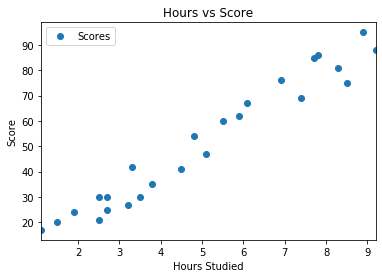

In [26]:
#Lets create a simple scatter plot to see if a linear relationship exist before we do Machine Learning
#This helps us physically see the standard deviation from the overall linear slope or trend
Sampledata.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [0]:
#Now we divide the data into "Attributes" and "Labels".
#Attributes are the independent variables  (x axis)
#Labels are the dependent variables whose values are to be predicted (y axis)
#Now We want to predict the percentage score depending upon the hours studied 
#iloc gets rows (or columns) at particular positions in the index 
#row selector and column selector
#Even though we only have 2 columns this comes in handy with data with multiple columns
x = Sampledata.iloc[:,0:-1].values #We want all the rows ":" and all the columns 
y = Sampledata.iloc[:, 1].values #We want all the rows ":" and just the second column as our (y axis = dependent variable = scores)

In [0]:
#Split the dataset into the training set and test set
#We're splitting the data for training and testing
#75% of it will be for training and 25% of it will be tested for accuracy
#xtrain: this will be your training group
#xtest: this will be your test group
#ytrain: this will be your target for your training group
#ytest: as you can imagine, this will be your target for your test group
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, test_size = 0.25, random_state = 0, shuffle=True)
 


In [0]:
#Thece codes train our algorithm for Linear Regression and Machine Learning
reg = LinearRegression()
reg.fit(xtrain, ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#We want to see the intercept
print(reg.intercept_)


1.9322042531516601


In [31]:
#That one more hour of study can increase chances of a higher score by 9.91% 
print(reg.coef_)


[9.94167834]


In [0]:
#we will use our test data and see how accurately our algorithm predicts the percentage score
#To make predictions on the test data
yprediction = reg.predict(xtest)



In [0]:
#This shows us the actual value of the test scores compared to the predicted values
#Not to bad but could use some tightening up
Sampledata2 = pd.DataFrame({'Actual': ytest, 'Predicted': yprediction})


In [34]:
Sampledata2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [35]:
from sklearn import metrics
#The Root Mean Squared Error is 4.5, which is less than 10% of the mean value of the percentages of all the students (51.48) 
#This means that our algorithm did a okay job
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, yprediction)) #the absolute value of the errors
print('Mean Squared Error:', metrics.mean_squared_error(ytest, yprediction)) #Mean Squared Error (MSE) is the mean of the squared errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, yprediction))) #Square root of the mean of the squared errors

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


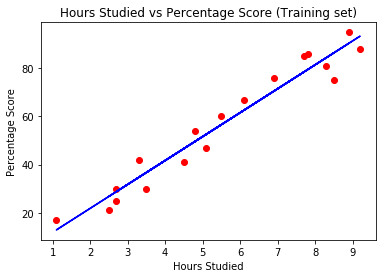

In [37]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, reg.predict(xtrain), color = 'blue')
plt.title('Hours Studied vs Percentage Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [0]:
Sampledata2 = pd.read_csv('https://raw.githubusercontent.com/TERRENCE2019/DATASETS/master/petrol_consumption.csv')


In [0]:
Sampledata2.head()


In [0]:
Sampledata2.describe()


In [0]:
x = Sampledata2[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = Sampledata2['Petrol_Consumption']

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, test_size = 0.25, random_state = 0, shuffle=True)


In [47]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])

In [50]:
coeff_df


,Coefficient
Petrol_tax,-42.736749
Average_income,-0.071840
Paved_Highways,-0.005937
Population_Driver_licence(%),1329.987662


In [0]:
This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption.
 Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. 
We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [0]:
yprediction = reg.predict(xtest)


In [0]:
Sampledata3 = pd.DataFrame({'Actual': ytest, 'Predicted': yprediction})


In [54]:
Sampledata3

,Actual,Predicted
29,534,472.118636
4,410,550.406182
26,577,594.549140
30,571,574.651279
32,577,655.427644
37,704,649.714981
34,487,518.977453
40,587,673.625435
7,467,500.013247
10,580,499.658004


In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, yprediction))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, yprediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, yprediction)))

Mean Absolute Error: 57.03775571483457
Mean Squared Error: 4489.974028440692
Root Mean Squared Error: 67.00726847470125


In [0]:
Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.